Part 1:Data analysis(missing, wrong, outliers,etc)

In [0]:
# import package
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [0]:
# read the data
df= pd.read_csv("time_series_covid19_confirmed_global.csv")
# data=pd.read_csv()

In [0]:
# show the data
df.head()

Province/State Country/Region      Lat  ...  5/2/20  5/3/20  5/4/20
0            NaN    Afghanistan  33.0000  ...    2469    2704    2894
1            NaN        Albania  41.1533  ...     789     795     803
2            NaN        Algeria  28.0339  ...    4295    4474    4648
3            NaN        Andorra  42.5063  ...     747     748     750
4            NaN         Angola -11.2027  ...      35      35      35

[5 rows x 108 columns]

In [0]:
print(df.shape)
print(df.describe())

(266, 108)
              Lat        Long  ...        5/3/20        5/4/20
count  266.000000  266.000000  ...  2.660000e+02  2.660000e+02
mean    21.259359   22.432499  ...  1.318319e+04  1.347013e+04
std     24.747943   70.478908  ...  7.657327e+04  7.801568e+04
min    -51.796300 -135.000000  ...  0.000000e+00  0.000000e+00
25%      6.907750  -18.093125  ...  8.225000e+01  8.675000e+01
50%     23.488100   20.921188  ...  5.085000e+02  5.425000e+02
75%     41.143200   77.191525  ...  2.515000e+03  2.635750e+03
max     71.706900  178.065000  ...  1.158040e+06  1.180375e+06

[8 rows x 106 columns]


In [0]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/30/20             int64
5/1/20              int64
5/2/20              int64
5/3/20              int64
5/4/20              int64
Length: 108, dtype: object

In [0]:
# delete the columns lat and long
df1=df.loc[:, ~df.columns.isin(['Lat', 'Long'])]
df1.head()

Province/State Country/Region  1/22/20  ...  5/2/20  5/3/20  5/4/20
0            NaN    Afghanistan        0  ...    2469    2704    2894
1            NaN        Albania        0  ...     789     795     803
2            NaN        Algeria        0  ...    4295    4474    4648
3            NaN        Andorra        0  ...     747     748     750
4            NaN         Angola        0  ...      35      35      35

[5 rows x 106 columns]

In [0]:
# get the sum of as the date
df1.iloc[:,2:].agg(['sum']).T.reset_index()

index      sum
0    1/22/20      555
1    1/23/20      654
2    1/24/20      941
3    1/25/20     1434
4    1/26/20     2118
..       ...      ...
99   4/30/20  3256853
100   5/1/20  3343777
101   5/2/20  3427343
102   5/3/20  3506729
103   5/4/20  3583055

[104 rows x 2 columns]

In [0]:
# transfer the dataframe and set Country/Region as index
df2=df1.groupby(['Country/Region']).sum().reset_index()
df2=df2.set_index('Country/Region').T
print(df2.shape)
df2.head()

(104, 187)


Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
1/22/20                   0        0        0  ...      0       0         0
1/23/20                   0        0        0  ...      0       0         0
1/24/20                   0        0        0  ...      0       0         0
1/25/20                   0        0        0  ...      0       0         0
1/26/20                   0        0        0  ...      0       0         0

[5 rows x 187 columns]

In [0]:
# only include countries that have cases more than 1000
df3 = df2[[i for i in df2.columns if df2[i][-1]>1000]]
print(df3.shape)
df3.head()

(104, 89)


Country/Region  Afghanistan  Algeria  ...  United Kingdom  Uzbekistan
1/22/20                   0        0  ...               0           0
1/23/20                   0        0  ...               0           0
1/24/20                   0        0  ...               0           0
1/25/20                   0        0  ...               0           0
1/26/20                   0        0  ...               0           0

[5 rows x 89 columns]

In [0]:
# headers = df3.iloc[0]
# df3  = pd.DataFrame(df3.values[1:], columns=headers)
# handle the null value
df4=df3.diff()
df4.fillna(0,inplace=True)
df4.shape
df4.tail()

Country/Region  Afghanistan  Algeria  ...  United Kingdom  Uzbekistan
4/30/20               232.0    158.0  ...          6040.0        37.0
5/1/20                164.0    148.0  ...          6204.0        47.0
5/2/20                134.0    141.0  ...          4815.0        32.0
5/3/20                235.0    179.0  ...          4342.0        31.0
5/4/20                190.0    174.0  ...          3990.0        40.0

[5 rows x 89 columns]

In [0]:
# process the data 
df4T= df4**0.5
df4T.tail()

Country/Region  Afghanistan    Algeria  ...  United Kingdom  Uzbekistan
4/30/20           15.231546  12.569805  ...       77.717437    6.082763
5/1/20            12.806248  12.165525  ...       78.765475    6.855655
5/2/20            11.575837  11.874342  ...       69.390201    5.656854
5/3/20            15.329710  13.379088  ...       65.893854    5.567764
5/4/20            13.784049  13.190906  ...       63.166447    6.324555

[5 rows x 89 columns]

In [0]:
# preprocess data:outlier and normalization 
from sklearn import preprocessing
# returns a numpy array
x = df4T.values 
# drop the outlier
min_max_scaler = preprocessing.MinMaxScaler()
# normalize the data
x_scaled = min_max_scaler.fit_transform(x)
df4TNorm = pd.DataFrame(x_scaled)
df4TNorm.columns = df4.columns
df4TNorm.head()

Country/Region  Afghanistan  Algeria  ...  United Kingdom  Uzbekistan
0                       0.0      0.0  ...             0.0         0.0
1                       0.0      0.0  ...             0.0         0.0
2                       0.0      0.0  ...             0.0         0.0
3                       0.0      0.0  ...             0.0         0.0
4                       0.0      0.0  ...             0.0         0.0

[5 rows x 89 columns]

Part 2: Plot 

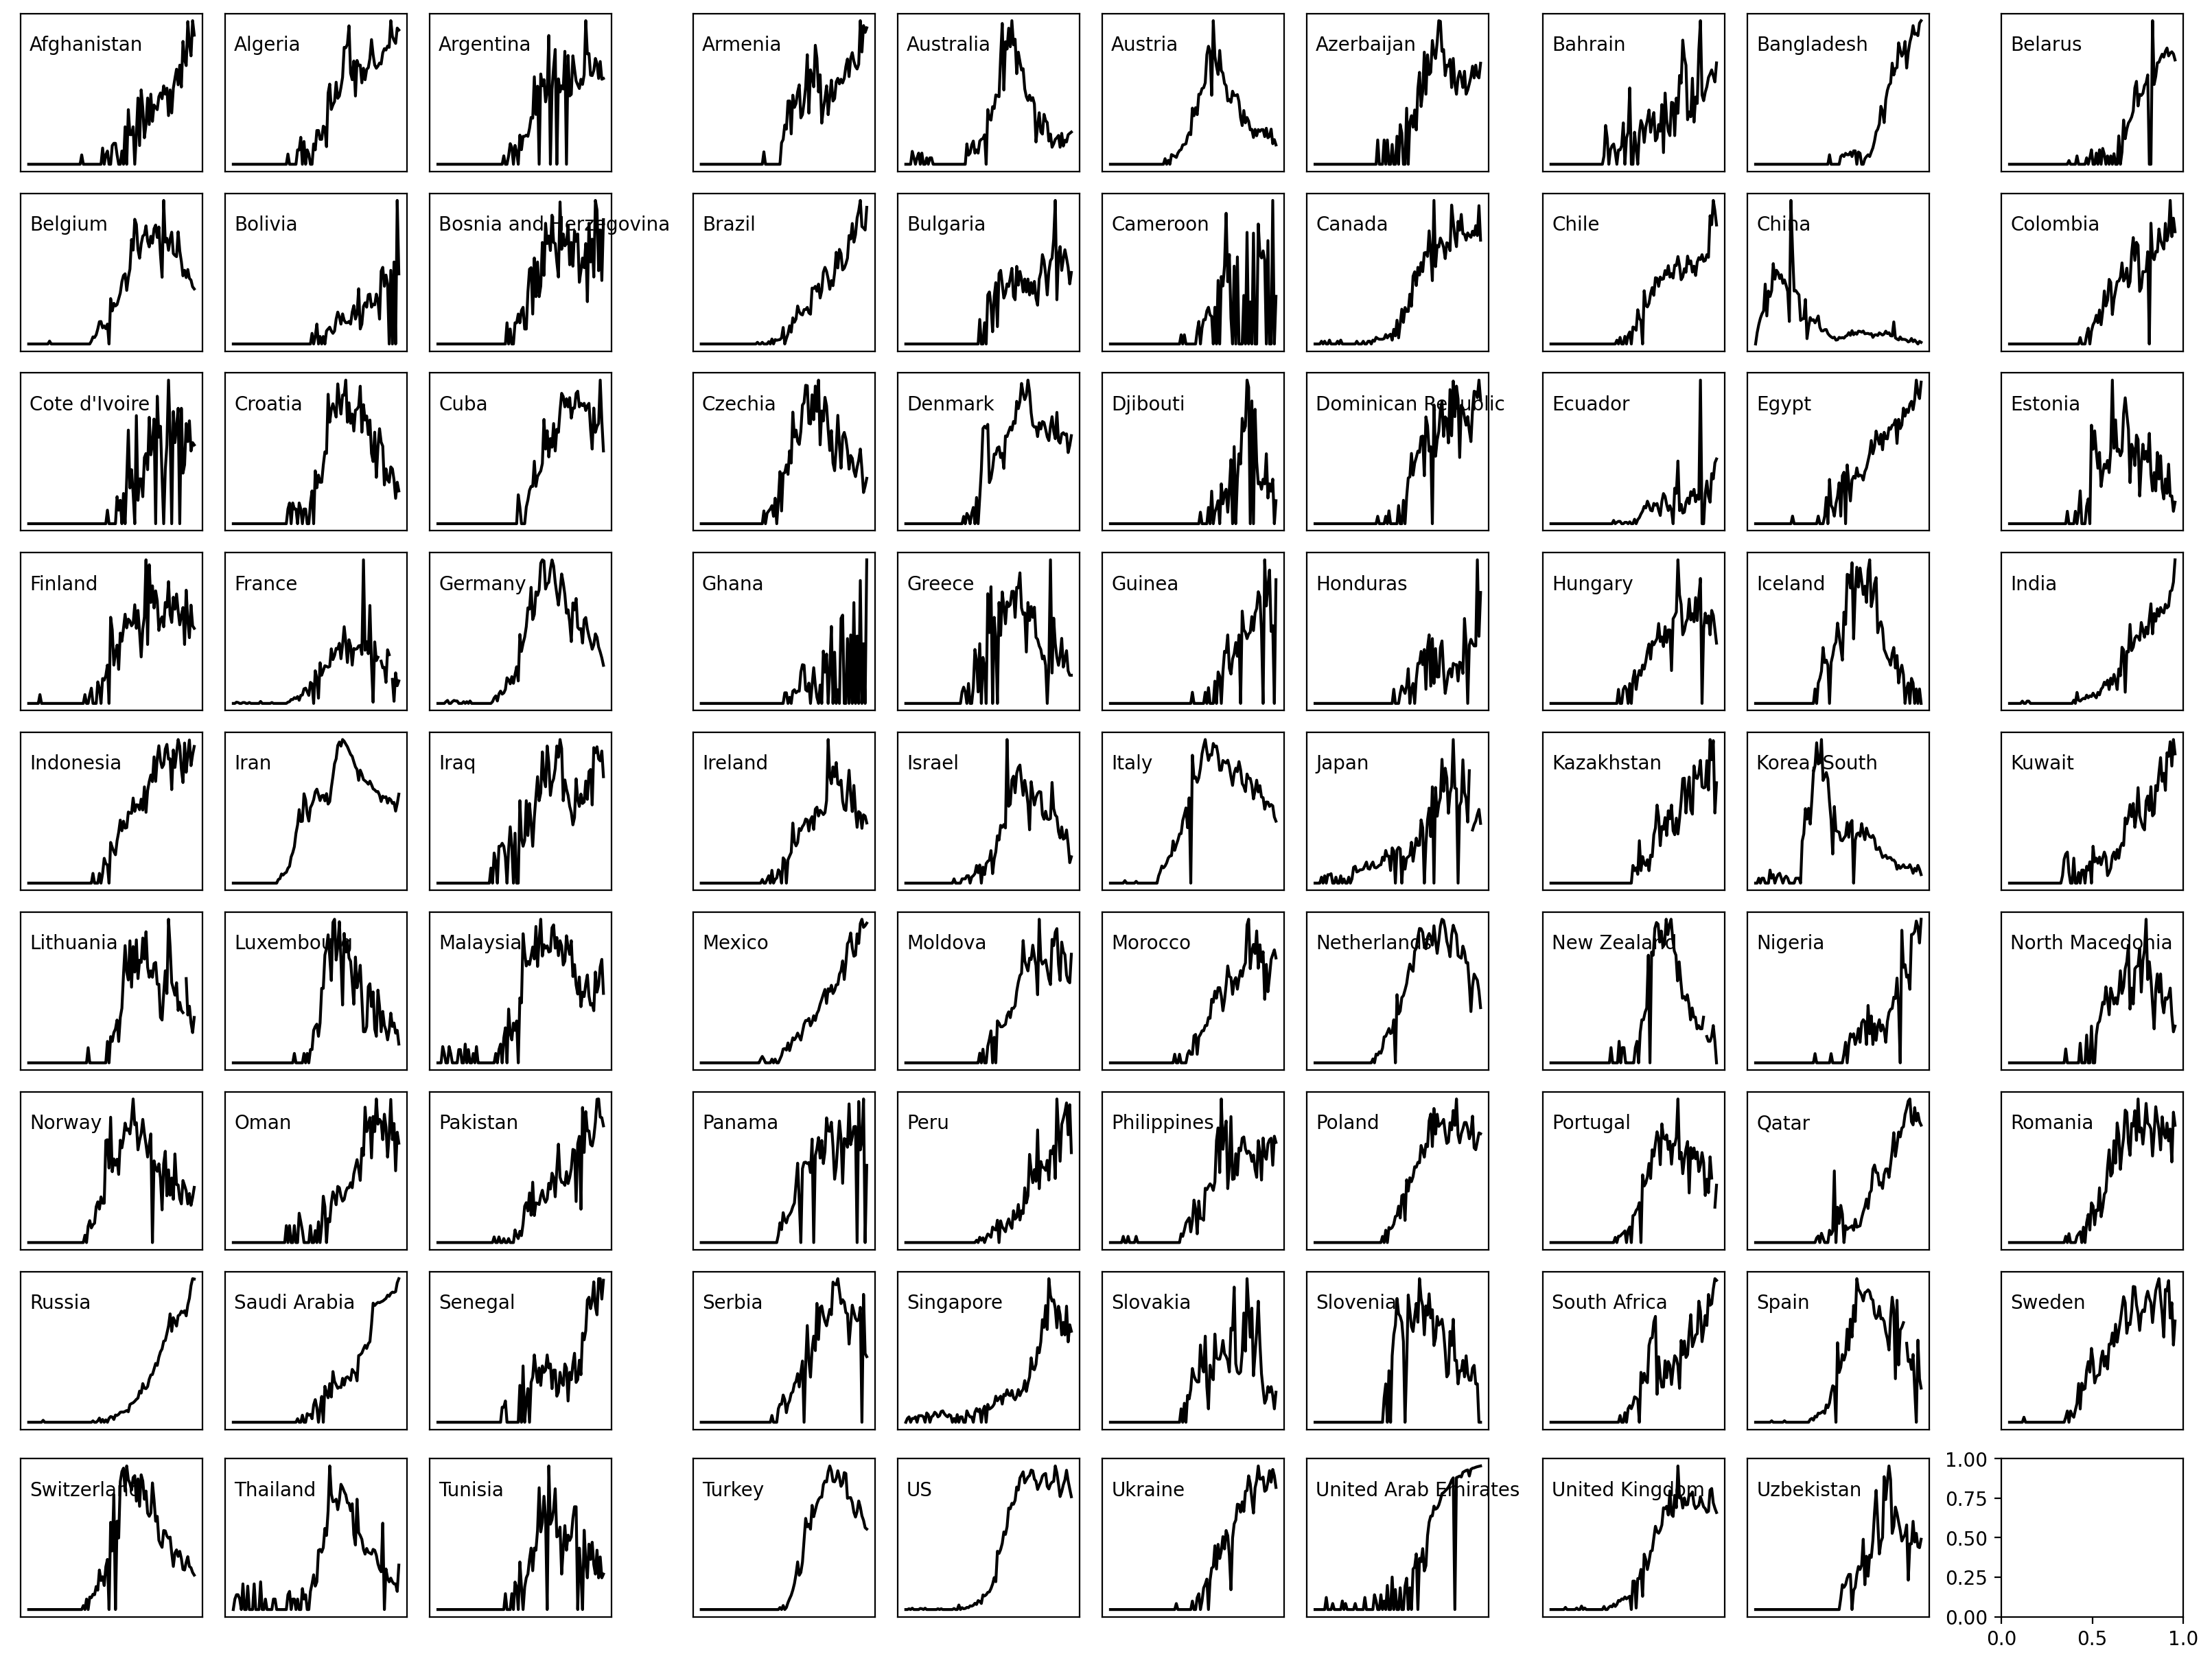

In [0]:
# we can get the pattern of every country
# pointed figure size and layout
fig = plt.figure(figsize=(16,12), dpi=200, constrained_layout=True)
axs = fig.subplots(nrows=9, ncols=10)
# plot every country trend of covid-19
for i in range(len(df4TNorm.columns)):
    axs.flat[i].plot(df4TNorm.index, df4TNorm.iloc[:,i], color='black')
    axs.flat[i].get_xaxis().set_ticks([])
    axs.flat[i].get_yaxis().set_ticks([])
    axs.flat[i].annotate(df4TNorm.iloc[:,i].name, (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')



```
# 此内容为代码格式
```

Part 3:Data compression(PCA)

In [0]:
# Define the feature(distance)
# Find the distance between each conuntries data from the others
# How close is the countries data to another
# The distance metric used is bray-curtis measure
def bray_curtis_distance(table, sample1_id, sample2_id):
    '''function to calculate Bray-curtis distance'''
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    denominator= 1 if (denominator==0) else denominator
    val = numerator / denominator
    return 0 if np.isnan(val) else val

In [0]:
# install the package
!pip install scikit-bio

In [0]:
# handle the missing value
df4TNorm.fillna(0)

Country/Region  Afghanistan   Algeria  ...  United Kingdom  Uzbekistan
0                  0.000000  0.000000  ...        0.000000    0.000000
1                  0.000000  0.000000  ...        0.000000    0.000000
2                  0.000000  0.000000  ...        0.000000    0.000000
3                  0.000000  0.000000  ...        0.000000    0.000000
4                  0.000000  0.000000  ...        0.000000    0.000000
..                      ...       ...  ...             ...         ...
99                 0.993597  0.891050  ...        0.831643    0.470698
100                0.835388  0.862391  ...        0.842858    0.530506
101                0.755124  0.841750  ...        0.742534    0.437741
102                1.000000  0.948418  ...        0.705120    0.430847
103                0.899172  0.935079  ...        0.675935    0.489409

[104 rows x 89 columns]

In [0]:
from skbio.stats.distance import DistanceMatrix
from numpy import zeros
# A distance matrix calculates for each country against all others
def getDistMat(table, fn):
    cols = table.columns
    ln = len(cols)
    print("Num samples: ",ln)
    data = zeros((ln, ln))
    for i, val1 in enumerate(cols):
        for j, val2 in enumerate(cols[:i]):
            data[i,j] = data[j,i] = fn(table, val1, val2)
    # print("Shape: ", data.shape)
    # print(data)
    return DistanceMatrix(data, cols)

In [0]:
# Calculating Distance Matrix
# We can get 89 features
distMat = getDistMat(df4TNorm, bray_curtis_distance)
print(distMat)

Num samples:  89
89x89 distance matrix
IDs:
'Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', ...
Data:
[[0.         0.23546879 0.25398372 ... 0.27152434 0.24624375 0.26431698]
 [0.23546879 0.         0.16760709 ... 0.17395523 0.10106716 0.25341739]
 [0.25398372 0.16760709 0.         ... 0.25808421 0.15335041 0.24390749]
 ...
 [0.27152434 0.17395523 0.25808421 ... 0.         0.17174142 0.2582741 ]
 [0.24624375 0.10106716 0.15335041 ... 0.17174142 0.         0.21536784]
 [0.26431698 0.25341739 0.24390749 ... 0.2582741  0.21536784 0.        ]]


In [0]:
# PCA would compress all 89 features into 2 features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transforms = pca.fit_transform(distMat.data)

In [0]:
# PCA variance
print(pca.explained_variance_)

[1.20720431 0.37731189]


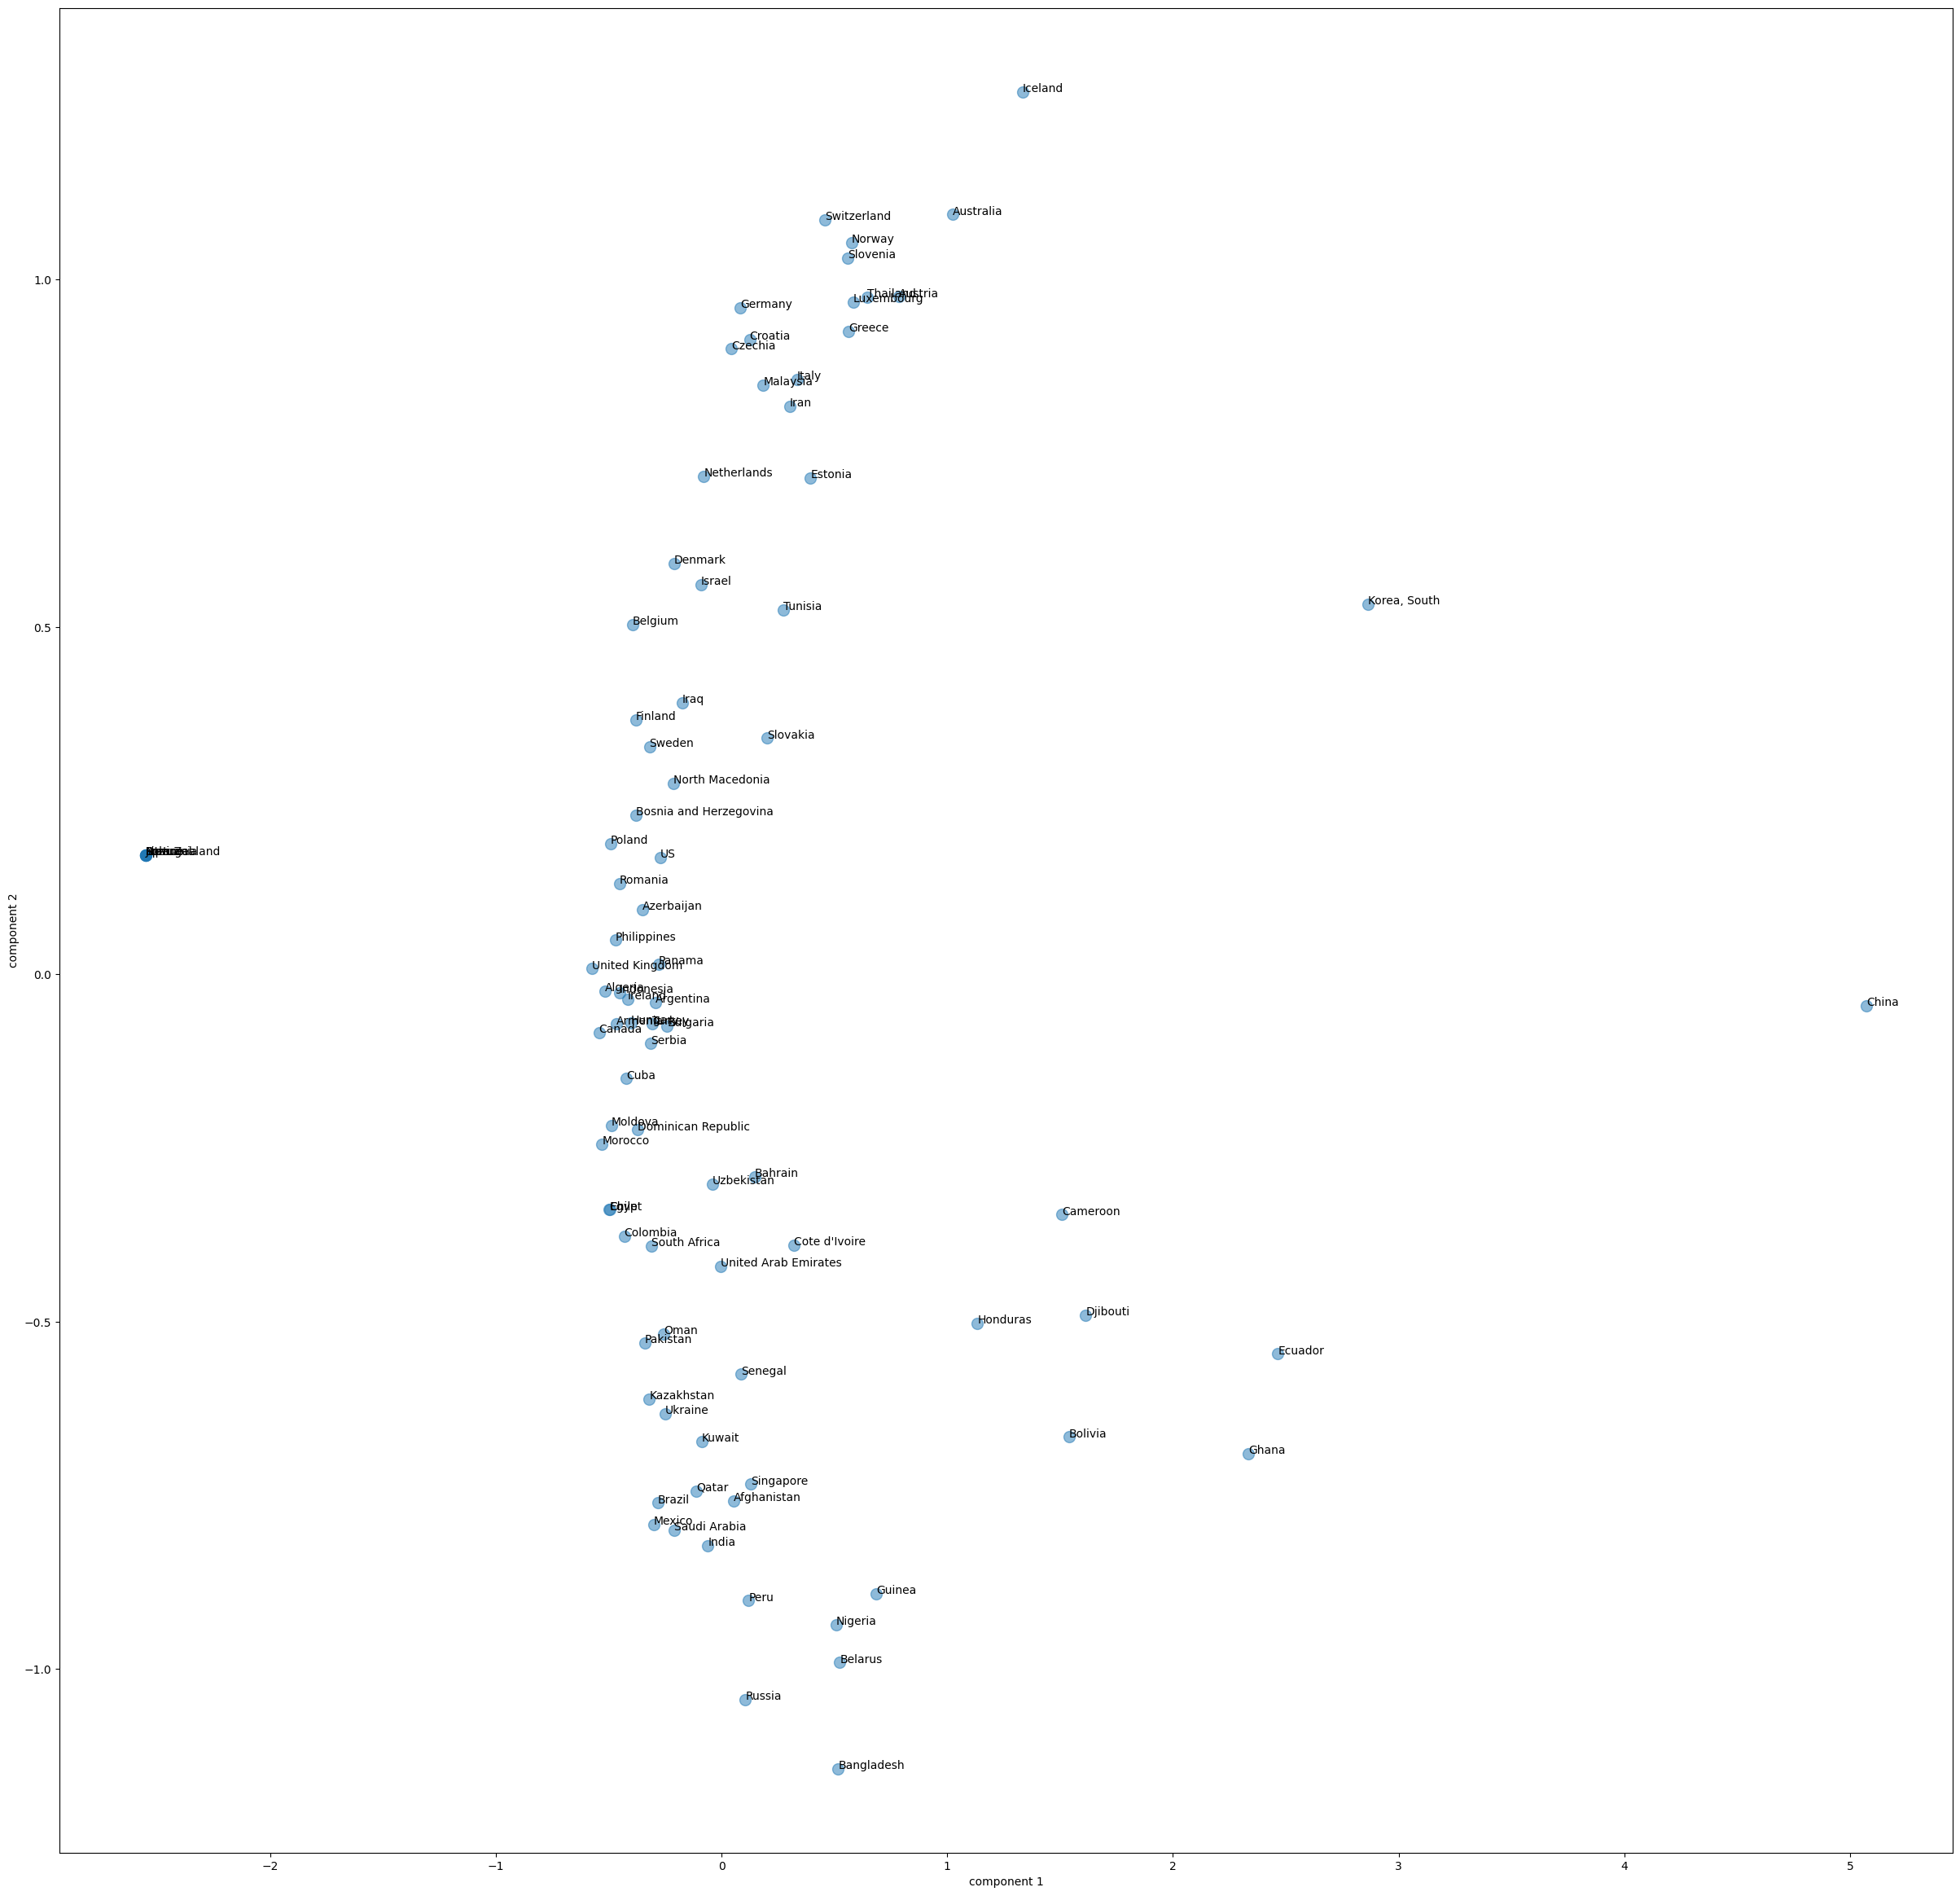

In [0]:
# plot scatetr of the feature after PCA
plt.figure(figsize=(30,30), dpi=100)
plt.scatter(transforms[:, 0], transforms[:, 1], s=100, alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
for i, country in enumerate(distMat.ids):
    plt.annotate(country, (transforms[:, 0][i], transforms[:, 1][i])) #+0.02

Part 4: Data clusters(Kmeans)




In [0]:
# Cluster countries using K-mean
# Define 5 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=5, random_state=0).fit(transforms)
kmeans.labels_

array([4, 0, 0, 0, 2, 2, 0, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 0, 1, 0, 4, 2,
       0, 2, 0, 1, 0, 1, 0, 2, 0, 3, 2, 1, 2, 4, 4, 0, 2, 4, 0, 2, 0, 0,
       2, 2, 3, 4, 1, 4, 3, 2, 2, 4, 0, 0, 2, 3, 4, 0, 2, 4, 4, 0, 4, 0,
       0, 3, 4, 0, 4, 4, 4, 0, 4, 2, 2, 0, 3, 0, 2, 2, 2, 0, 0, 4, 4, 0,
       4], dtype=int32)

In [0]:
# Get the new dataframe using cluster and two features
# We can see the specific cluster of each feature 
transformsDF = pd.DataFrame({'cluster': kmeans.labels_, 'PC1':transforms[:, 0], 'PC2':transforms[:, 1]})
# transforms['cluster']=dataset['clus']
transformsDF

cluster       PC1       PC2
0         4  0.053722 -0.757719
1         0 -0.515906 -0.023914
2         0 -0.292753 -0.040125
3         0 -0.464397 -0.071726
4         2  1.024037  1.093765
..      ...       ...       ...
84        0 -0.271424  0.168282
85        4 -0.248670 -0.632788
86        4 -0.003275 -0.420277
87        0 -0.573301  0.008152
88        4 -0.039467 -0.301999

[89 rows x 3 columns]

Part 5: Classification(SVM and KNN)

In [0]:
#import package
from  sklearn.model_selection  import  train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm

In [0]:
# Use SVC to do Classification
# Define two features as x and clusters as y
data=transformsDF.drop(['cluster'], axis=1)
x=np.array(data)
y=transformsDF['cluster'].values
# split train and test for x
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.4 , random_state= 3 )
clf = svm.SVC()  
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
# we can get the square of R as accuracy
accuracy =abs(clf.score(X_test, y_test))
# The accuracy is : 97.22%, which means it's a good model
print("The accuracy is :{}%".format(accuracy *100))

The accuracy is :97.22222222222221%


In [0]:
# Use KNN to do Classification
# Select 3 neighbors
KNN=KNeighborsClassifier(n_neighbors=3) 
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)
accuracy =abs(KNN.score(X_test, y_test))
#The accuracy is :94.44%, which means SVC is a better model
print("The accuracy is :{}%".format(accuracy *100))

The accuracy is :94.44444444444444%


part 6: Plot the cluster

In [0]:
# Assign every cluster for a color
color = []
for i in kmeans.labels_:
  if i == 3:
      color.append('#338a4a')
  elif i == 0:
      color.append('#a32a1f')
  elif i == 1:
      color.append('#ed841a')
  elif i == 2:
      color.append('#453bd9')
  else:
      color.append('#3bd9bc')

In [0]:
# Get a new dataframe contains 'Cluster'	'Country'	'Color' 'Cases'	'PC1' 'PC2'
clusInfo = pd.DataFrame({'Cluster':kmeans.labels_,'Country':distMat.ids, 'Color':color,
                         'Cases':[df4[i].sum() for i in distMat.ids], 'PC1':transforms[:, 0],
                         'PC2':transforms[:, 1]})
clusInfo

Cluster               Country    Color      Cases       PC1       PC2
0         4           Afghanistan  #3bd9bc     2894.0  0.053722 -0.757719
1         0               Algeria  #a32a1f     4648.0 -0.515906 -0.023914
2         0             Argentina  #a32a1f     4887.0 -0.292753 -0.040125
3         0               Armenia  #a32a1f     2507.0 -0.464397 -0.071726
4         2             Australia  #453bd9     6847.0  1.024037  1.093765
..      ...                   ...      ...        ...       ...       ...
84        0                    US  #a32a1f  1180374.0 -0.271424  0.168282
85        4               Ukraine  #3bd9bc    12331.0 -0.248670 -0.632788
86        4  United Arab Emirates  #3bd9bc    14730.0 -0.003275 -0.420277
87        0        United Kingdom  #a32a1f   191832.0 -0.573301  0.008152
88        4            Uzbekistan  #3bd9bc     2189.0 -0.039467 -0.301999

[89 rows x 6 columns]

In [0]:
# Sort the data using cluster 
clusInfo = clusInfo.replace({'Cluster': {0: 4, 1: 3, 2:0, 3:1, 4:2}})
clusInfo = clusInfo.sort_values(by=['Cluster','Cases'], ascending=False)
clusInfo = clusInfo.reset_index(drop=True)
clusInfo

Cluster         Country    Color      Cases       PC1       PC2
0         4              US  #a32a1f  1180374.0 -0.271424  0.168282
1         4  United Kingdom  #a32a1f   191832.0 -0.573301  0.008152
2         4          Turkey  #a32a1f   127659.0 -0.307859 -0.071745
3         4          Canada  #a32a1f    61957.0 -0.543196 -0.083701
4         4         Belgium  #a32a1f    50267.0 -0.394543  0.503297
..      ...             ...      ...        ...       ...       ...
84        0         Iceland  #453bd9     1799.0  1.334103  1.270509
85        0         Estonia  #453bd9     1703.0  0.394570  0.714288
86        0        Slovenia  #453bd9     1439.0  0.560006  1.030755
87        0        Slovakia  #453bd9     1413.0  0.200817  0.339929
88        0         Tunisia  #453bd9     1018.0  0.272296  0.524732

[89 rows x 6 columns]

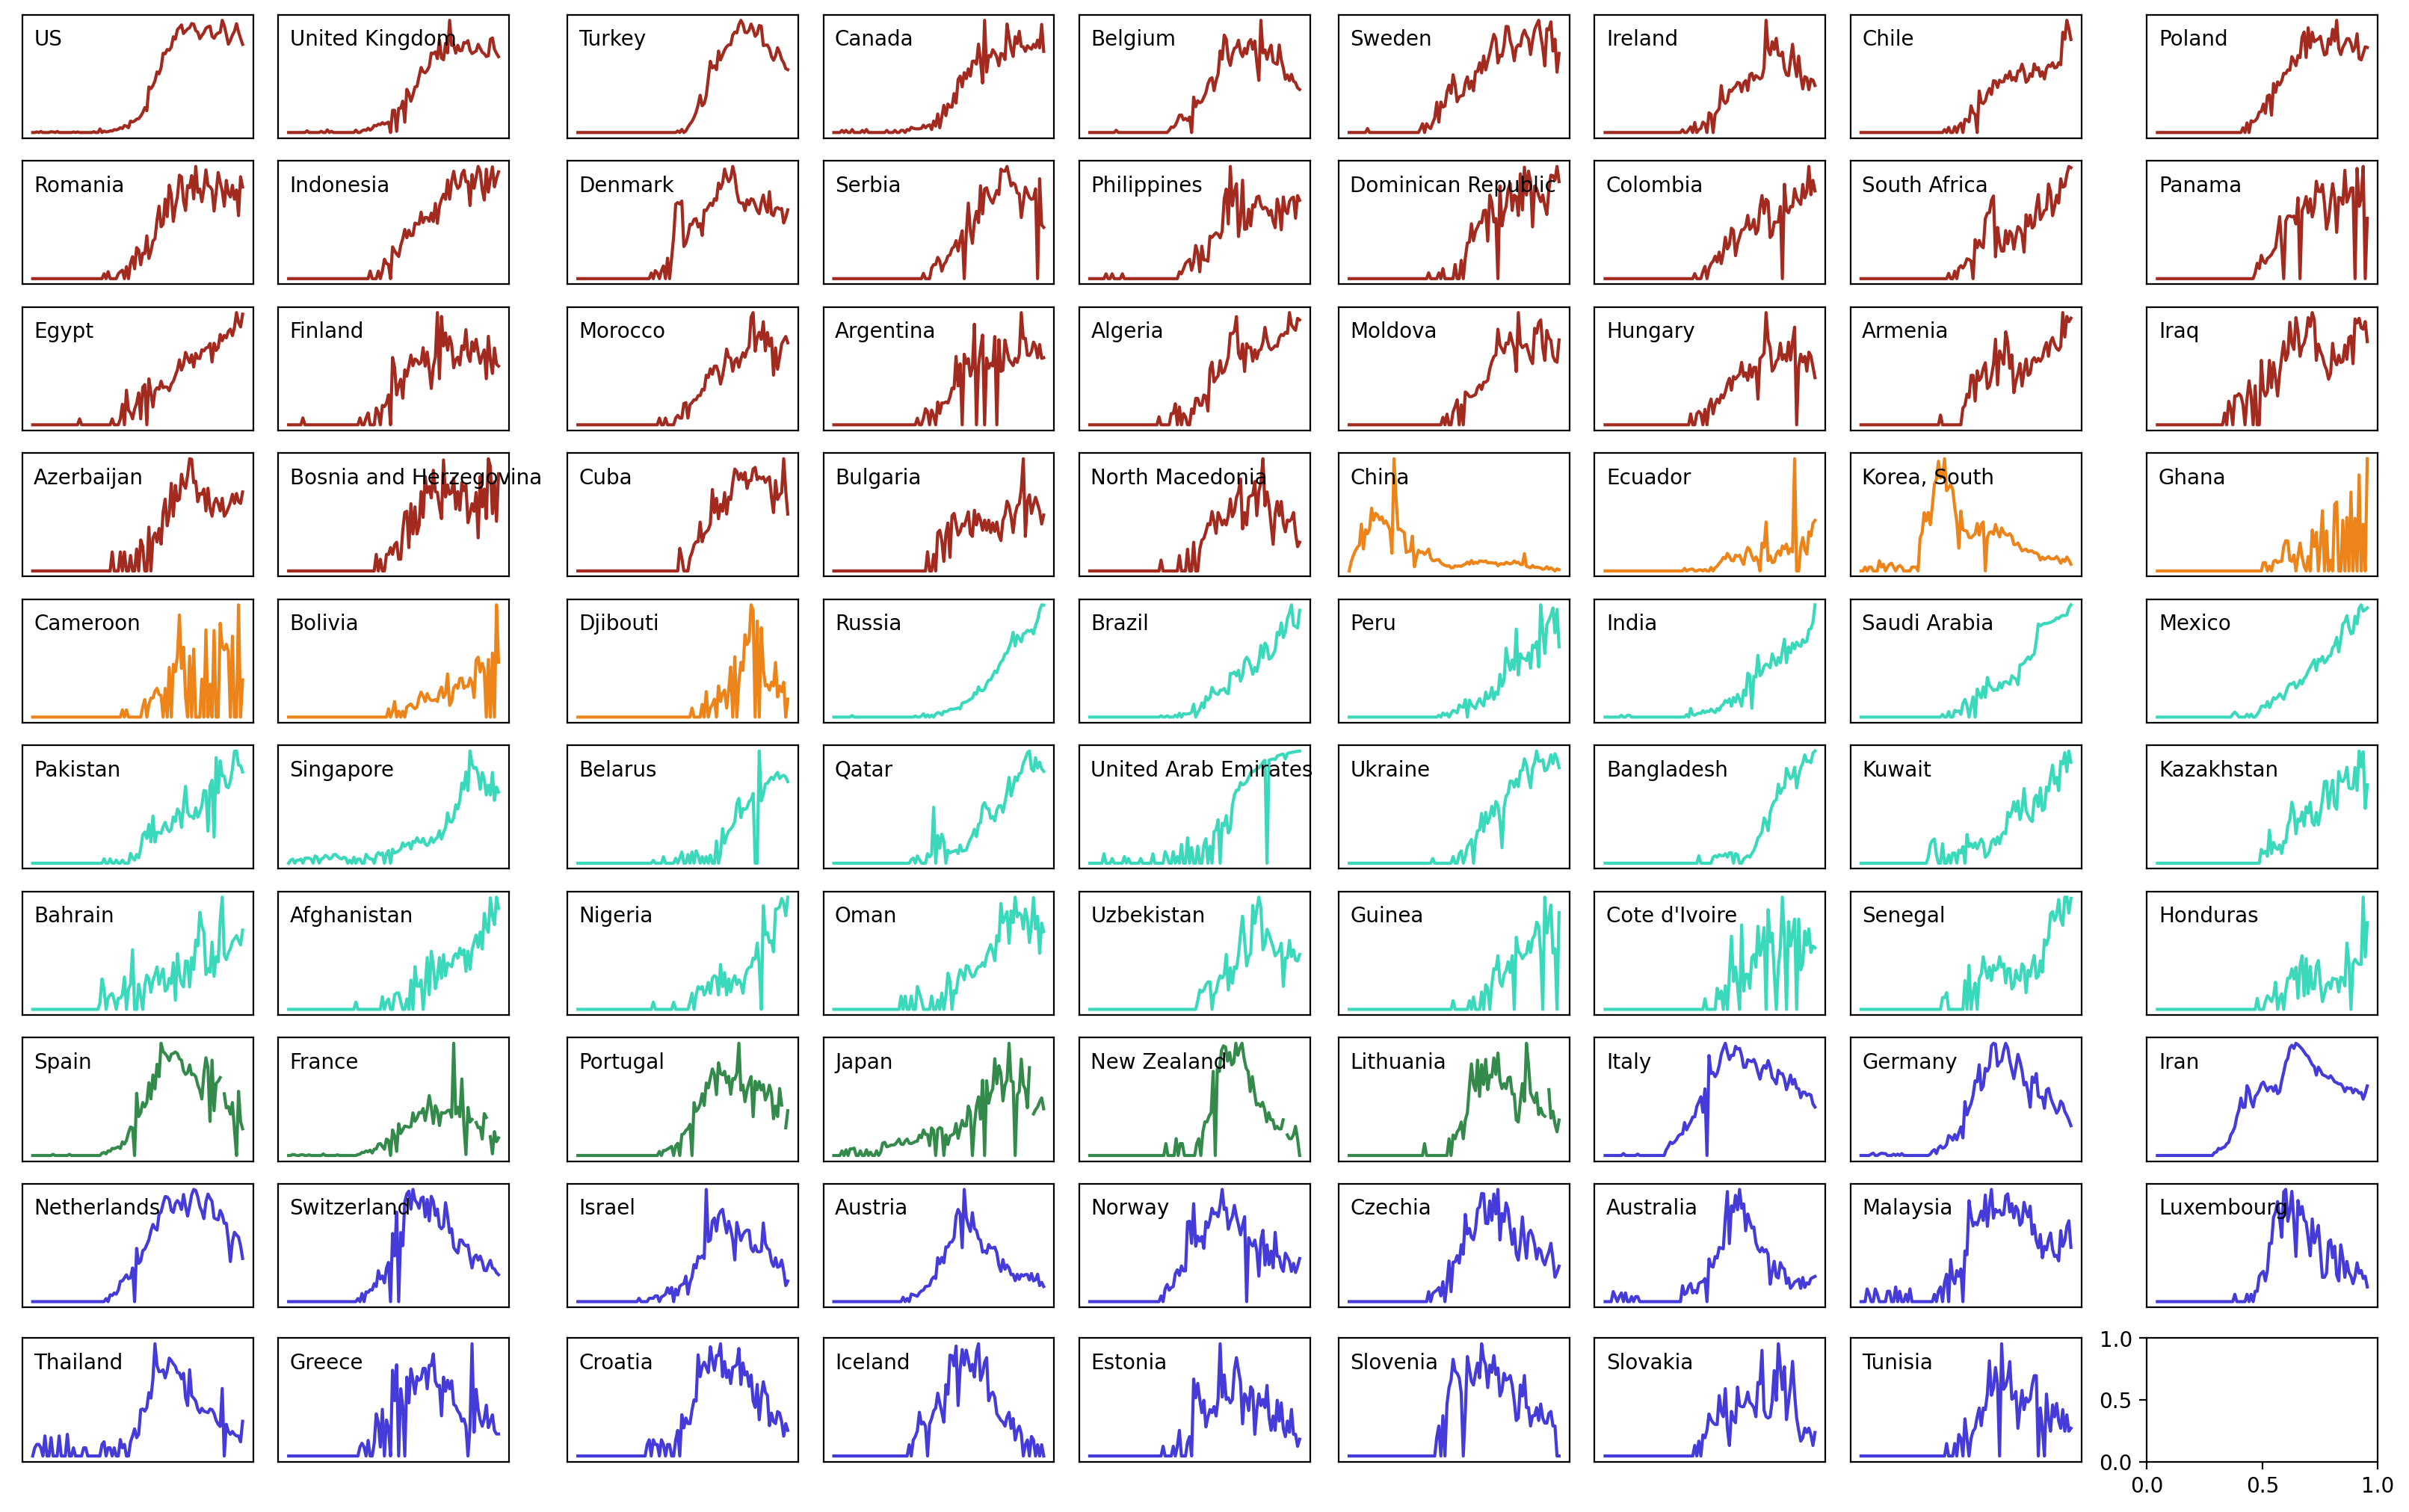

In [0]:
# Plot the cluster using different color
# We can see same pattern has same color
# So we have 5 pattern
fig1 = plt.figure(figsize=(16,10), dpi=200, constrained_layout=True)
splts = fig1.subplots(nrows=10, ncols=9)
for order, i in clusInfo.iterrows():
  splts.flat[order].plot(df4TNorm.index, df4TNorm[i['Country']], color=i['Color'])
  splts.flat[order].get_xaxis().set_ticks([])
  splts.flat[order].get_yaxis().set_ticks([])
  splts.flat[order].annotate(i['Country'], (0.05, 0.8),xycoords='axes fraction', va='center', ha='left')

In [0]:
# install package 
!pip install -U plotly

In [0]:
# We can see the distribution of cluster using world map
# The map are divided into 5 parts
import pandas as pd
import plotly.express as px
import json

# with open('countries-hires.json') as f:
#     countries = json.load(f)
countries=[]
with open('countries-hires.json', encoding='cp1252') as f:
    countries = json.loads(f.read())

fig = px.choropleth(clusInfo, geojson=countries, locations='Country', color='Cluster',
                    locationmode= 'country names',color_continuous_scale="Viridis",
                           range_color=(0, 4),
                           labels={'Cluster':'Covid Cluster'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

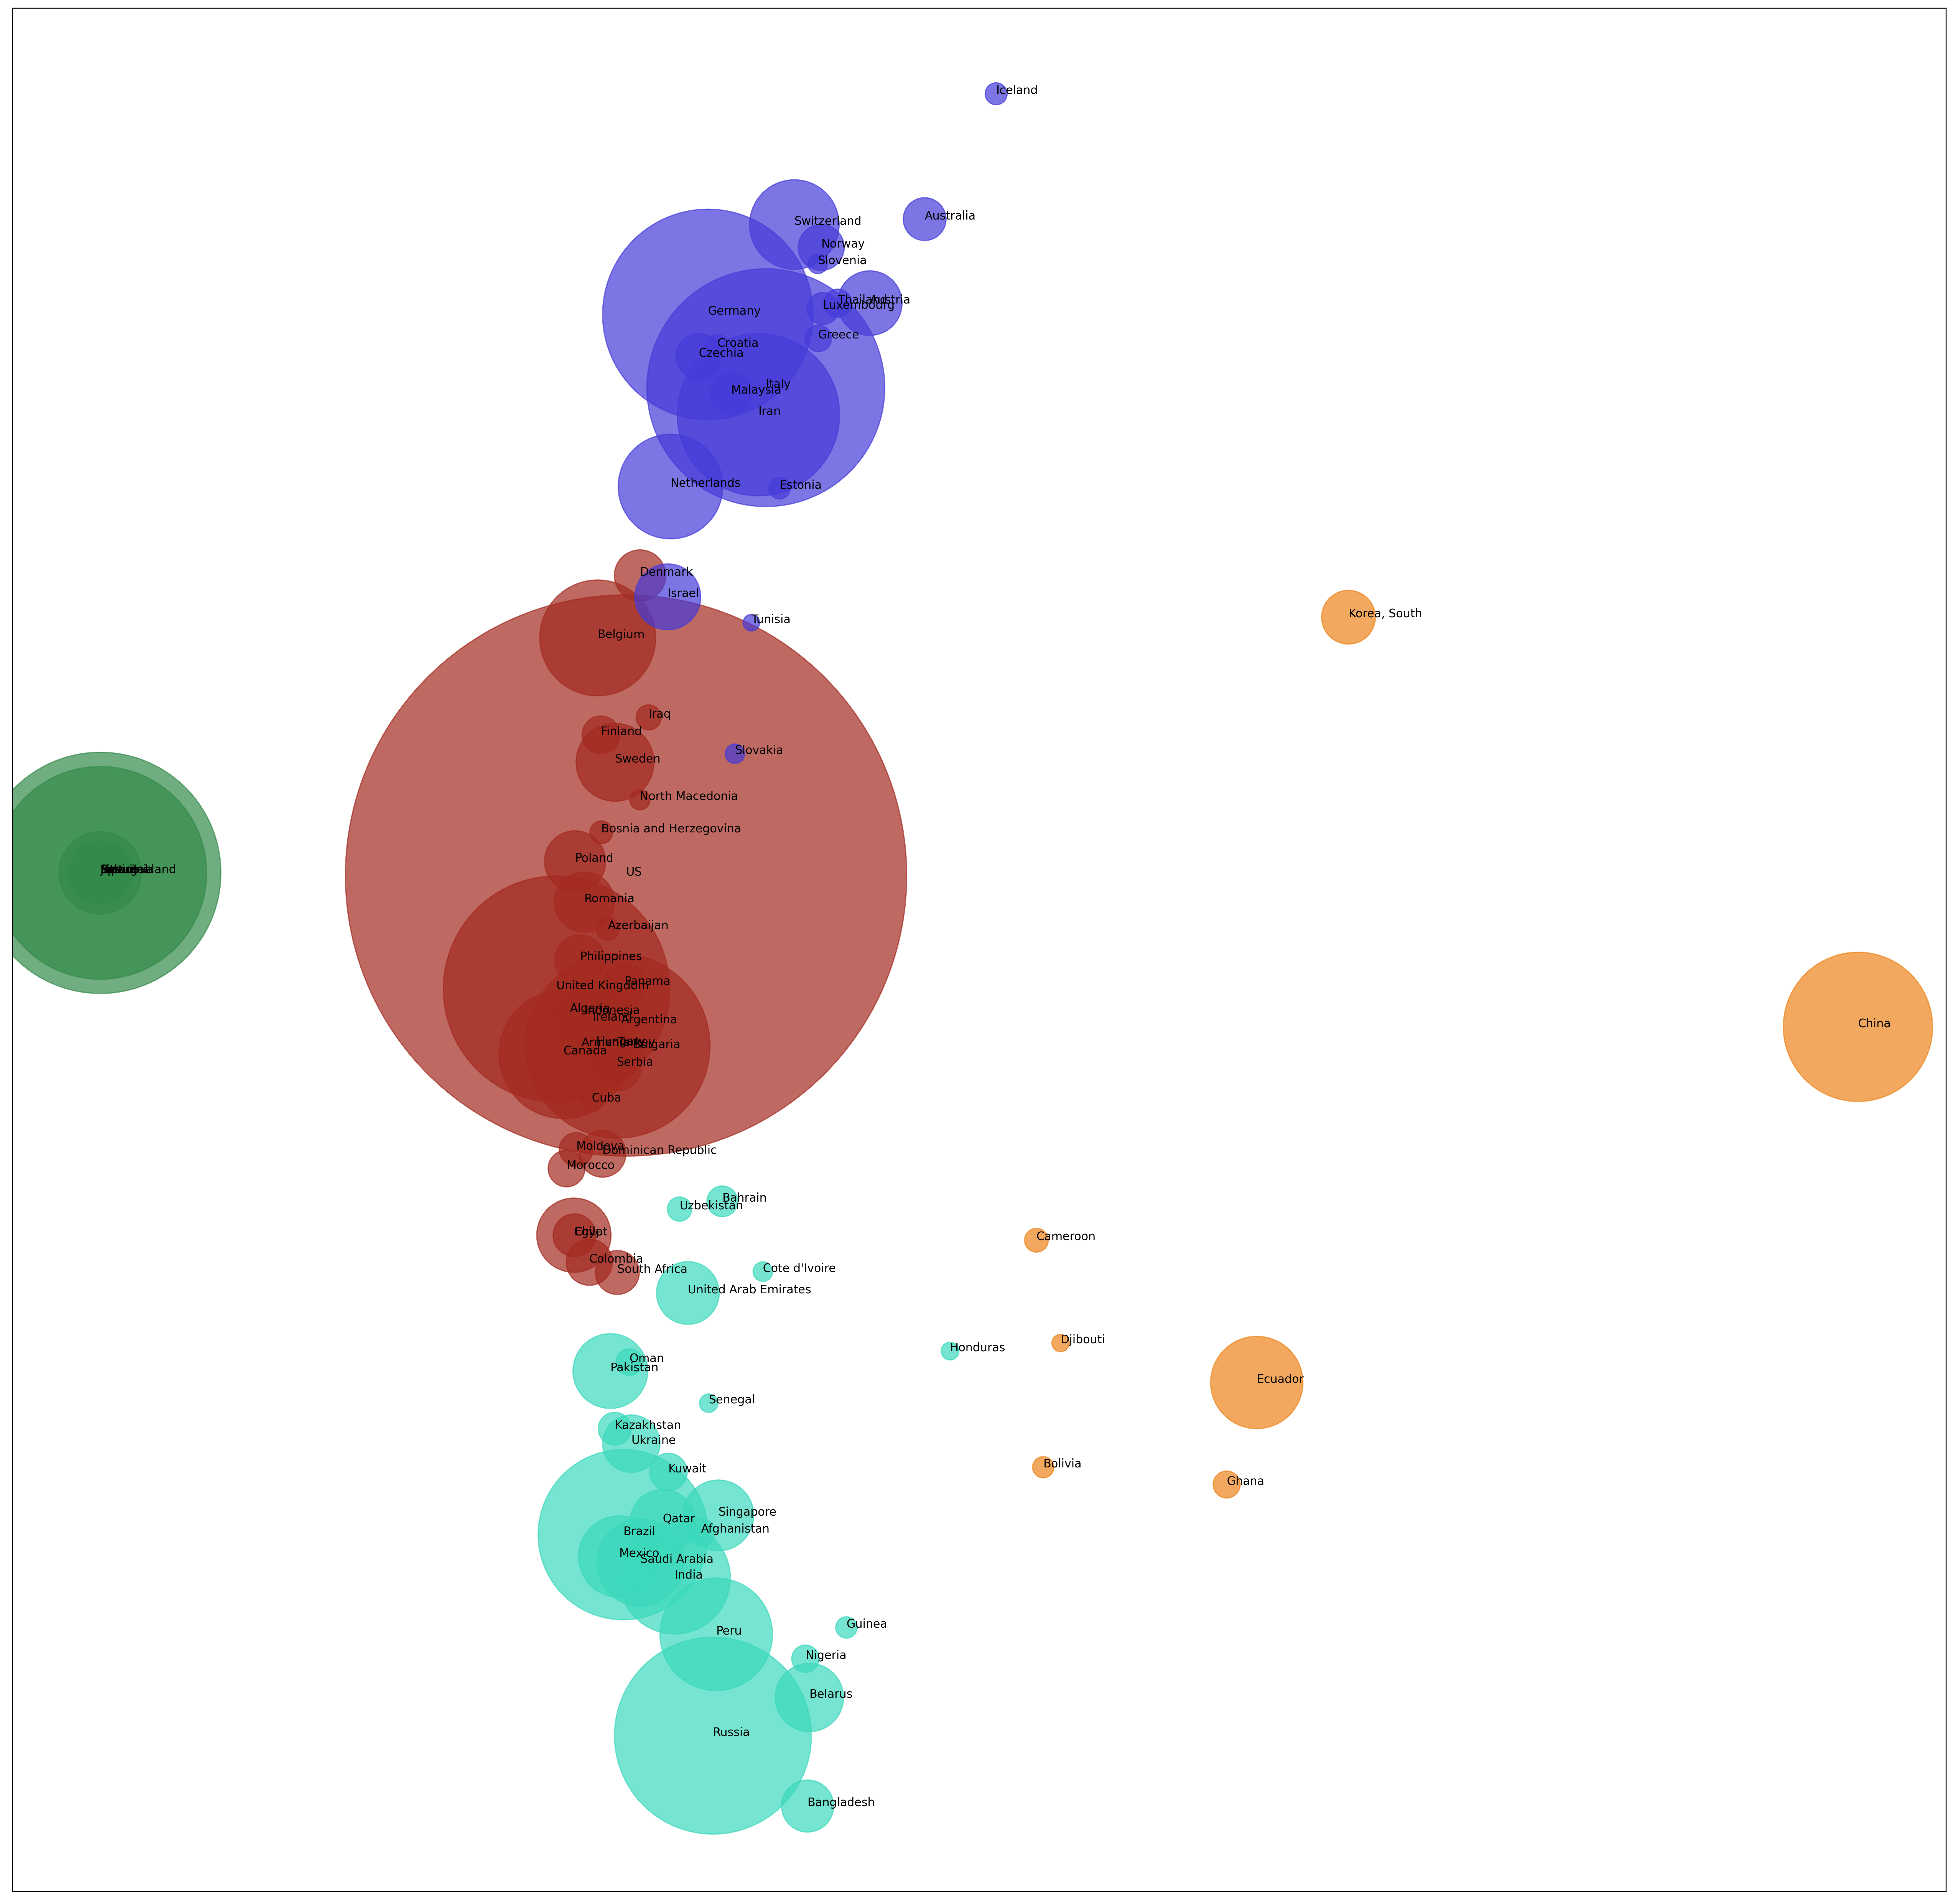

In [0]:
# Plotting the clusters with case intensity 
fig3 = plt.figure(figsize=(30,30), dpi=300)
ax1 = fig3.add_subplot()
ax1.scatter(clusInfo['PC1'], clusInfo['PC2'], c=clusInfo['Color'], s=clusInfo['Cases']/5,
            alpha=0.7)
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
for i, txt in enumerate(clusInfo['Country']):
    ax1.annotate(txt, (clusInfo['PC1'][i], clusInfo['PC2'][i]))#+0.02

Part 7 : Analyze impact of covid-19

In [0]:
# We use stock value as a element to see the impact of covid-19
# We choose three typical country:China, The United States and The united Kingdom
# Analyzing Stock Market data for China
# Select the covid-19 data of China
chinaData= df2['China']

In [0]:
# Get the new increasd cases of every day
chinaData= chinaData.diff()

In [0]:
# process the missing value
chinaData=chinaData.fillna(548)
chinaData

1/22/20    548.0
1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
           ...  
4/30/20     12.0
5/1/20       3.0
5/2/20       0.0
5/3/20       5.0
5/4/20       2.0
Name: China, Length: 104, dtype: float64

In [0]:
chinaData=chinaData.reset_index()

In [0]:
# We use stock value of shanghaiIn
shanghaiIn= pd.read_csv("shanghai_Index_short.csv")
shanghaiIn

Country      Category  ... HistoricalDataSymbol               LastUpdate
0    China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
1    China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
2    China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
3    China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
4    China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
..     ...           ...  ...                  ...                      ...
60   China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
61   China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
62   China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
63   China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633
64   China  Stock Market  ...               SHCOMP  2020-05-04T22:02:25.633

[65 rows x 7 columns]

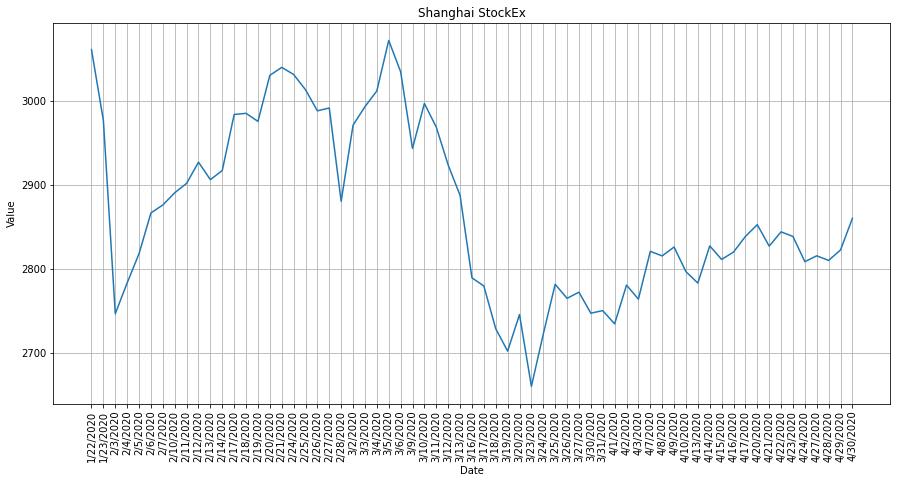

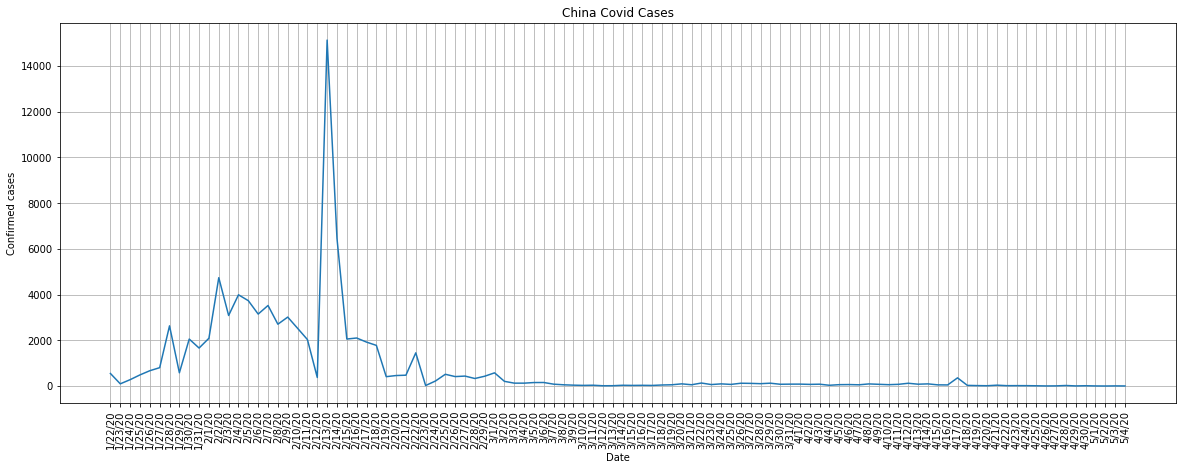

In [0]:
# plot the trend of Stock value and Covid-19 cases
plt.figure(figsize=(15,7))
plt.plot(shanghaiIn['DateTime'], shanghaiIn['Value'])
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Shanghai StockEx")
plt.grid()
plt.show()

plt.figure(figsize=(20,7))
plt.plot(chinaData['index'], chinaData['China'])
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.xticks(rotation=90)
plt.title("China Covid Cases")
plt.grid()
plt.show()

In [0]:
# We  want to plot the two trend into one graph
# Set the same datetime index
chinaData[["index"]] = chinaData[["index"]].apply(pd.to_datetime)
shanghaiIn[["DateTime"]] = shanghaiIn[["DateTime"]].apply(pd.to_datetime)

In [0]:
# Get new stock value dataframe
chinaSubset= chinaData.loc[chinaData['index'].isin(shanghaiIn['DateTime'])]
print(chinaData.shape)
print(chinaSubset.shape)
print(shanghaiIn.shape)
chinaSubset

(104, 2)
(65, 2)
(65, 8)


index   China
0  2020-01-22   548.0
1  2020-01-23    95.0
12 2020-02-03  3086.0
13 2020-02-04  3991.0
14 2020-02-05  3733.0
..        ...     ...
93 2020-04-24    15.0
96 2020-04-27     6.0
97 2020-04-28    22.0
98 2020-04-29     4.0
99 2020-04-30    12.0

[65 rows x 2 columns]

In [0]:
# Combine covid and stock value into one dataframe
shanghaiIn['covid']=chinaSubset['China'].to_numpy()
shanghaiIn1= shanghaiIn[['Value','covid']]

In [0]:
# Preprocess data
from sklearn import preprocessing
x = shanghaiIn1.values 
cols=shanghaiIn1.columns
# Drop the outlier
min_max_scaler = preprocessing.MinMaxScaler()
# Standardized data
x_scaled = min_max_scaler.fit_transform(x)
shanghaiIn1 = pd.DataFrame(x_scaled)
shanghaiIn1.columns = cols
shanghaiIn1['DateTime']=shanghaiIn['DateTime']
print(shanghaiIn1)

       Value     covid   DateTime
0   0.973457  0.035950 2020-01-22
1   0.768781  0.006014 2020-01-23
2   0.210052  0.203674 2020-02-03
3   0.299192  0.263481 2020-02-04
4   0.383759  0.246431 2020-02-05
..       ...       ...        ...
60  0.360531  0.000727 2020-04-24
61  0.377457  0.000132 2020-04-27
62  0.364164  0.001190 2020-04-28
63  0.394341  0.000000 2020-04-29
64  0.485809  0.000529 2020-04-30

[65 rows x 3 columns]


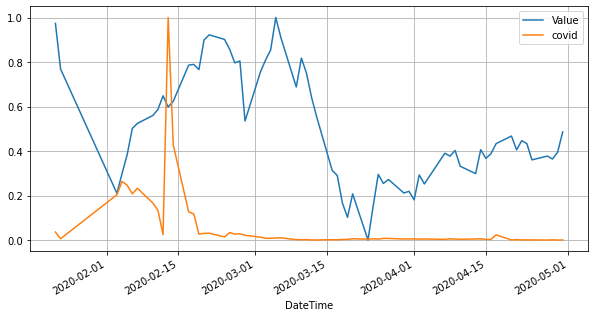

In [0]:
# Plot the data
# From the graph, we can easily see the impact of covid
shanghaiIn1.plot(x='DateTime', y=['Value', 'covid'], figsize=(10,5), grid=True)

In [78]:
# Analyzing Stock Market data for US
# Get the US data
usData= df2['US']
usData

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
4/30/20    1069424
5/1/20     1103461
5/2/20     1132539
5/3/20     1158040
5/4/20     1180375
Name: US, Length: 104, dtype: int64

In [0]:
# Get the new increased data of every day
usData= usData.diff()

In [80]:
# Propocess missing values
usData=usData.fillna(1)
usData

1/22/20        1.0
1/23/20        0.0
1/24/20        1.0
1/25/20        0.0
1/26/20        3.0
            ...   
4/30/20    29515.0
5/1/20     34037.0
5/2/20     29078.0
5/3/20     25501.0
5/4/20     22335.0
Name: US, Length: 104, dtype: float64

In [0]:
usData=usData.reset_index()

In [82]:
# We use stock value of Dow Jones
induIn= pd.read_csv("INDU_US_index.csv")
induIn

Country      Category  ... HistoricalDataSymbol               LastUpdate
0   United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
1   United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
2   United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
3   United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
4   United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
..            ...           ...  ...                  ...                      ...
67  United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
68  United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
69  United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
70  United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043
71  United States  Stock Market  ...                 INDU  2020-05-04T22:01:05.043

[72 rows x 7 columns]

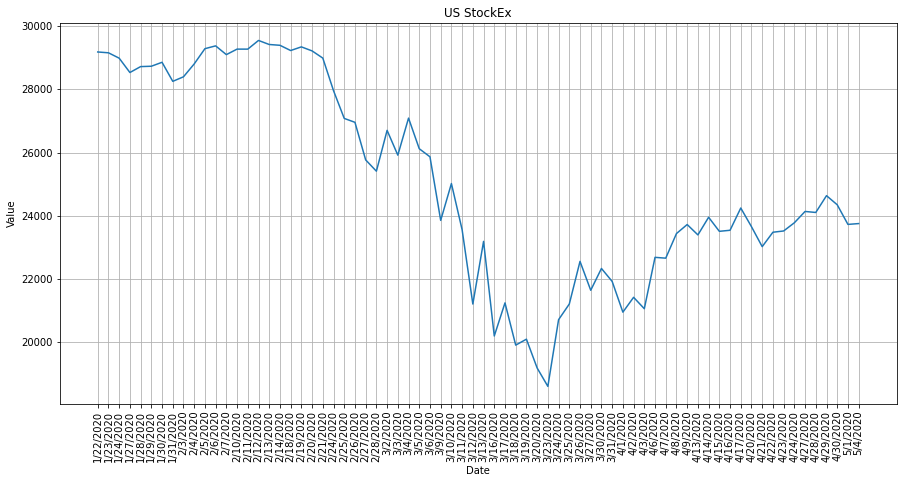

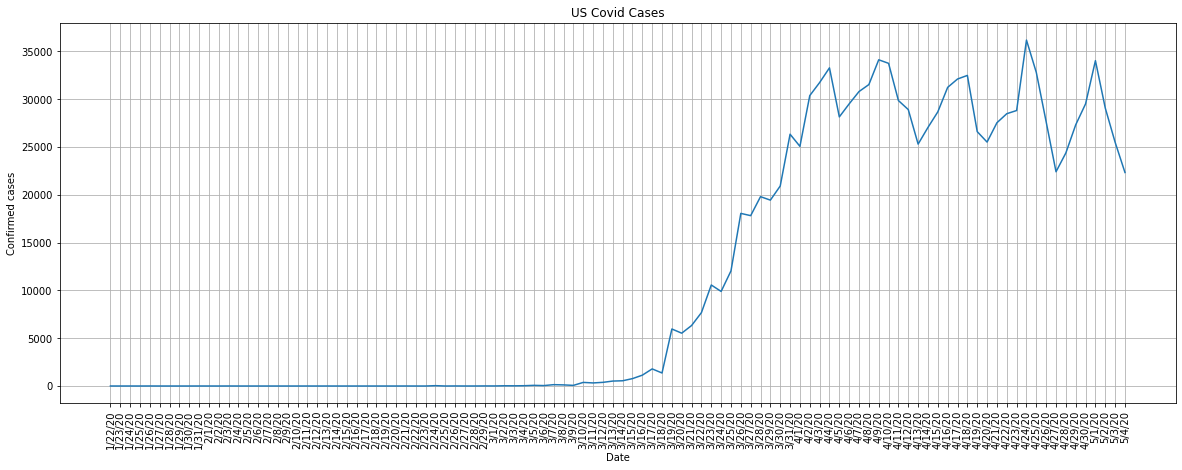

In [83]:
# Plot the trend of Stock value and Covid-19 cases
plt.figure(figsize=(15,7))
plt.plot(induIn['DateTime'], induIn['Value'])
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("US StockEx")
plt.grid()
plt.show()

plt.figure(figsize=(20,7))
plt.plot(usData['index'], usData['US'])
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.xticks(rotation=90)
plt.title("US Covid Cases")
plt.grid()
plt.show()

In [0]:
# We  want to plot the two trend into one graph
# Set the same datetime index
usData[["index"]] = usData[["index"]].apply(pd.to_datetime)
induIn[["DateTime"]] = induIn[["DateTime"]].apply(pd.to_datetime)

In [85]:
usSubset= usData.loc[usData['index'].isin(induIn['DateTime'])]
print(usData.shape)
print(usSubset.shape)
print(induIn.shape)
usSubset

(104, 2)
(72, 2)
(72, 7)


index       US
0   2020-01-22      1.0
1   2020-01-23      0.0
2   2020-01-24      1.0
5   2020-01-27      0.0
6   2020-01-28      0.0
..         ...      ...
97  2020-04-28  24385.0
98  2020-04-29  27327.0
99  2020-04-30  29515.0
100 2020-05-01  34037.0
103 2020-05-04  22335.0

[72 rows x 2 columns]

In [87]:
# Combine covid and stock value into one dataframe
induIn['covid']=usSubset['US'].to_numpy()
induIn1= induIn[['Value','covid']]
induIn1

Value    covid
0   29186.27      1.0
1   29160.09      0.0
2   28989.73      1.0
3   28535.80      0.0
4   28722.85      0.0
..       ...      ...
67  24101.55  24385.0
68  24633.86  27327.0
69  24345.72  29515.0
70  23723.69  34037.0
71  23749.76  22335.0

[72 rows x 2 columns]

In [0]:
# Preprocess data
from sklearn import preprocessing
x = induIn1.values 
cols=induIn1.columns
# Drop the outlier
min_max_scaler = preprocessing.MinMaxScaler()
# Standardized data
x_scaled = min_max_scaler.fit_transform(x)
induIn1 = pd.DataFrame(x_scaled)
induIn1.columns = cols
induIn1['DateTime']=induIn['DateTime']

In [89]:
induIn1

Value     covid   DateTime
0   0.966682  0.000028 2020-01-22
1   0.964293  0.000000 2020-01-23
2   0.948749  0.000028 2020-01-24
3   0.907330  0.000000 2020-01-27
4   0.924397  0.000000 2020-01-28
..       ...       ...        ...
67  0.502726  0.673842 2020-04-28
68  0.551297  0.755140 2020-04-29
69  0.525005  0.815602 2020-04-30
70  0.468248  0.940560 2020-05-01
71  0.470627  0.617194 2020-05-04

[72 rows x 3 columns]

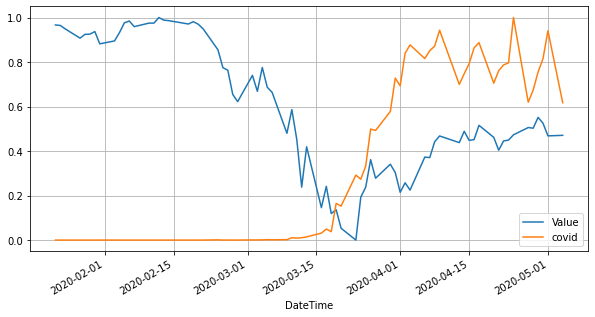

In [90]:
# Plot the data
# From the graph, we can easily see the impact of covid
induIn1.plot(x='DateTime', y=['Value', 'covid'], figsize=(10,5), grid=True)

In [0]:
# Analyzing Stock Market data for UK
# Get the data of UK
ukData= df2['United Kingdom']

In [0]:
# Get the new increased data of every day
ukData= ukData.diff()

In [93]:
# Propocess missing values
ukData=ukData.fillna(0)
ukData

1/22/20       0.0
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
            ...  
4/30/20    6040.0
5/1/20     6204.0
5/2/20     4815.0
5/3/20     4342.0
5/4/20     3990.0
Name: United Kingdom, Length: 104, dtype: float64

In [0]:
ukData=ukData.reset_index()

In [95]:
# We get the stock value of FTSE100
ukxIn= pd.read_csv("UKX_UK_index.csv")
ukxIn

Country      Category  ... HistoricalDataSymbol               LastUpdate
0   United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
1   United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
2   United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
3   United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
4   United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
..             ...           ...  ...                  ...                      ...
67  United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
68  United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
69  United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
70  United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847
71  United Kingdom  Stock Market  ...                  UKX  2020-05-04T22:00:11.847

[72 rows x 7 columns]

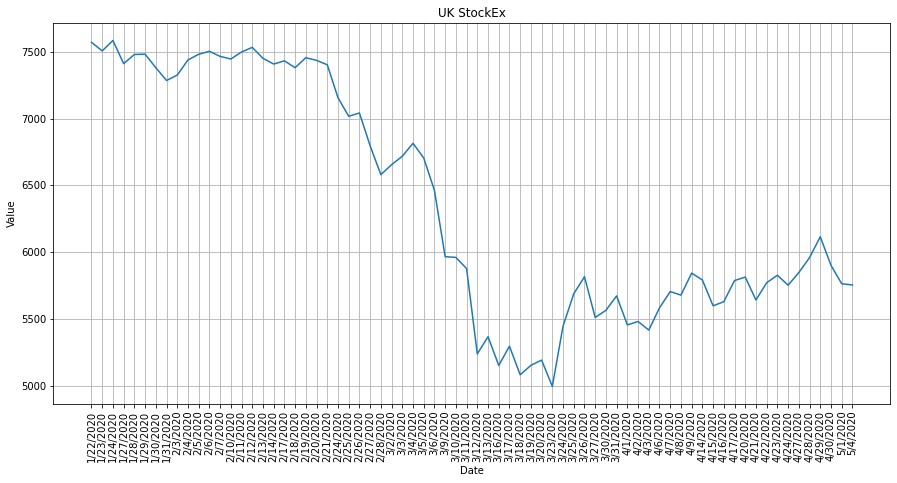

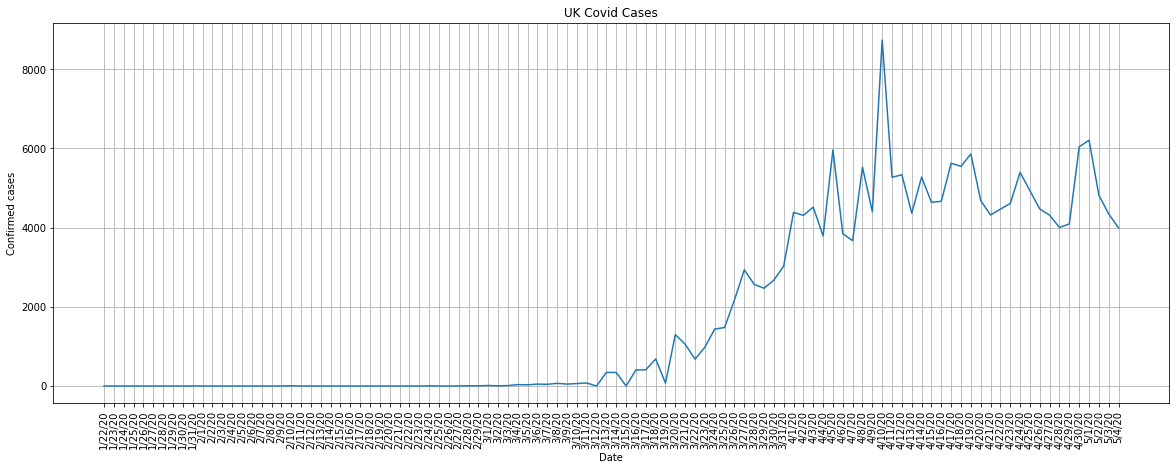

In [96]:
# Plot the trend of Stock value and Covid-19 cases
plt.figure(figsize=(15,7))
plt.plot(ukxIn['DateTime'], ukxIn['Value'])
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("UK StockEx")
plt.grid()
plt.show()

plt.figure(figsize=(20,7))
plt.plot(ukData['index'], ukData['United Kingdom'])
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.xticks(rotation=90)
plt.title("UK Covid Cases")
plt.grid()
plt.show()

In [97]:
# We  want to plot the two trend into one graph
# Set the same datetime index
ukData[["index"]] = ukData[["index"]].apply(pd.to_datetime)
ukxIn[["DateTime"]] = ukxIn[["DateTime"]].apply(pd.to_datetime)
ukSubset= ukData.loc[ukData['index'].isin(ukxIn['DateTime'])]
print(ukData.shape)
print(ukSubset.shape)
print(ukxIn.shape)
ukSubset

(104, 2)
(72, 2)
(72, 7)


index  United Kingdom
0   2020-01-22             0.0
1   2020-01-23             0.0
2   2020-01-24             0.0
5   2020-01-27             0.0
6   2020-01-28             0.0
..         ...             ...
97  2020-04-28          4002.0
98  2020-04-29          4091.0
99  2020-04-30          6040.0
100 2020-05-01          6204.0
103 2020-05-04          3990.0

[72 rows x 2 columns]

In [0]:
# Combine covid and stock value into one dataframe
ukxIn['covid']=ukSubset['United Kingdom'].to_numpy()
ukxIn1= ukxIn[['Value','covid']]


In [0]:
# Preprocess data
from sklearn import preprocessing
x = ukxIn1.values 
cols=ukxIn1.columns
# Drop the outlier
min_max_scaler = preprocessing.MinMaxScaler()
# Standardized data
x_scaled = min_max_scaler.fit_transform(x)
ukxIn1 = pd.DataFrame(x_scaled)
ukxIn1.columns = cols
ukxIn1['DateTime']=ukxIn['DateTime']

In [100]:
ukxIn1

Value     covid   DateTime
0   0.994576  0.000000 2020-01-22
1   0.969789  0.000000 2020-01-23
2   1.000000  0.000000 2020-01-24
3   0.932900  0.000000 2020-01-27
4   0.959380  0.000000 2020-01-28
..       ...       ...        ...
67  0.372136  0.645068 2020-04-28
68  0.432608  0.659413 2020-04-29
69  0.350034  0.973565 2020-04-30
70  0.296737  1.000000 2020-05-01
71  0.293157  0.643133 2020-05-04

[72 rows x 3 columns]

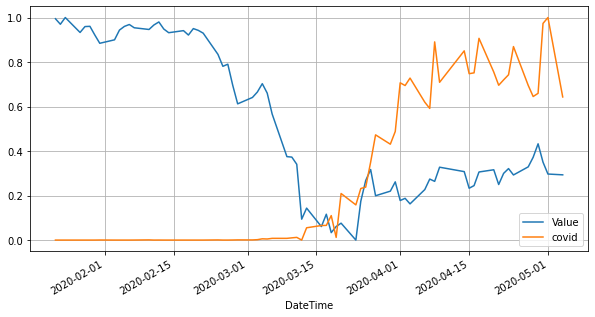

In [0]:
# Plot the data
# From the graph, we can easily see the impact of covid
ukxIn1.plot(x='DateTime', y=['Value', 'covid'], figsize=(10,5), grid=True)

Part 8: Prediction for stock value

In [0]:
# Regression Analysis forecast od Stock Index for United Kingdom
# Combining all the data
# ukxIn1['opening']= ukxIn1['Value'].shift()
ukxIn2= ukxIn[['Value','covid','DateTime']]
ukxIn2

Value   covid   DateTime
0   7571.92     0.0 2020-01-22
1   7507.67     0.0 2020-01-23
2   7585.98     0.0 2020-01-24
3   7412.05     0.0 2020-01-27
4   7480.69     0.0 2020-01-28
..      ...     ...        ...
67  5958.50  4002.0 2020-04-28
68  6115.25  4091.0 2020-04-29
69  5901.21  6040.0 2020-04-30
70  5763.06  6204.0 2020-05-01
71  5753.78  3990.0 2020-05-04

[72 rows x 3 columns]

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# Prepare the data return train set and test set
def prepare_data(df,forecast_col, covid_col, covid,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out)
    X = np.array(df[[forecast_col, covid_col]]) if covid  else np.array(df[[forecast_col]]) 
    X = preprocessing.scale(X)
    X_forecast = X[-forecast_out:]
    X = X[:-forecast_out]
    label.dropna(inplace=True)
    y = np.array(label)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=72)

    response = [X_train,X_test , Y_train, Y_test , X_forecast]
    return response;

In [0]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
#define x and y and predict 10 days value after 
forecast_col = 'Value'
covid_col='covid'
forecast_out = 10
test_size = 0.2
covid= True

X_train, X_test, Y_train, Y_test , X_forecast= prepare_data(ukxIn2,forecast_col,covid_col,covid,forecast_out,test_size)

print("Including the COVID cases count")
#OLS to do linerRegression
print("Linear Regression")
learner = linear_model.LinearRegression()
learner.fit(X_train,Y_train)
score=learner.score(X_test,Y_test)
forecast= learner.predict(X_forecast)
#See the accurancy
print(score)
print(forecast)

#Ridge Regression
print("Ridge Regression:")
clf = Ridge(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)

#Lasso Regrssion
print("Lasso Regression:")
clf = Lasso(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))

score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)

#Support Vector regressor
print("Support Vector Regression:")
clf=SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)

Including the COVID cases count
Linear Regression
0.6859399986851307
[5803.86036544 5914.07859486 5968.33139149 5980.12794226 5957.92318297
 6015.20675171 6140.56058926 6147.58385183 6057.96915731 5860.46176818]
Ridge Regression:
r2 score is = 0.6849809686497884
0.6849809686497884
[5801.07719691 5909.68016869 5962.98713917 5972.90808734 5953.35694937
 6010.6567771  6134.35399743 6136.98528732 6048.05150787 5857.74039798]
Lasso Regression:
r2 score is = 0.685891796370531
0.685891796370531
[5803.22611145 5913.24948028 5967.38234567 5978.88678652 5957.09218203
 6014.41080308 6139.57176843 6145.89934299 6056.34233844 5859.86943461]
Support Vector Regression:
r2 score is = 0.743338416577092
0.743338416577092
[5801.8701086  5830.01462487 5847.03001871 5860.43840365 5839.42235766
 5855.32695997 5910.36251842 5902.2940079  5883.8126865  5804.52295907]


In [0]:
covid= False
print("Not inclusing covid count")

X_train, X_test, Y_train, Y_test , X_forecast= prepare_data(ukxIn2,forecast_col,covid_col,covid,forecast_out,test_size);

print("Linear Regression:")
learner = linear_model.LinearRegression(); 
learner.fit(X_train,Y_train);
score=learner.score(X_test,Y_test);
forecast= learner.predict(X_forecast)
print(score)
print(forecast)

#Ridge Regression
print("Ridge")
clf = Ridge(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Lasso Regrssion
print("Lasso: ")
clf = Lasso(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))

score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Support Vector regressor
print("SVR")
clf=SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)


Not inclusing covid count
Linear Regression:
0.6711618482987114
[5635.45256212 5717.69646279 5753.22125878 5706.01985961 5766.0274464
 5836.91838888 5936.39162523 5800.56226951 5712.89255594 5707.00348651]
Ridge
r2 score is = 0.6696723100209541
0.6696723100209541
[5638.43259625 5720.19139822 5755.50665852 5708.58366708 5768.23731148
 5838.71011834 5937.59663229 5802.56843805 5715.41582623 5709.56149226]
Lasso: 
r2 score is = 0.6710299481435071
0.6710299481435071
[5635.71927562 5717.91975989 5753.42580241 5706.24932077 5766.22522966
 5837.07874894 5936.49947354 5800.7418219  5713.11838902 5707.23242841]
SVR
r2 score is = 0.6957319816690711
0.6957319816690711
[5721.44619647 5744.2184805  5756.98981401 5740.41084738 5762.03451376
 5794.22317921 5851.6212633  5776.81094948 5742.62870456 5740.72419253]


Part 9: Forecasting of Unemployment rate for US, UK, and China

Regression Analysis forecast of Unemployment rate  for United States
         Country           Category  ... HistoricalDataSymbol           LastUpdate
0  United States  Unemployment Rate  ...              USURTOT  2012-02-23T11:41:00
1  United States  Unemployment Rate  ...              USURTOT  2012-02-23T11:41:00
2  United States  Unemployment Rate  ...              USURTOT  2012-02-23T11:41:00
3  United States  Unemployment Rate  ...              USURTOT  2012-02-23T11:41:00
4  United States  Unemployment Rate  ...              USURTOT  2012-02-23T11:41:00

[5 rows x 7 columns]
0.7205453277782565
[4.1804584  4.1804584  4.1804584  4.02528328 4.10287084 4.02528328
 4.02528328 4.10287084 4.02528328 4.72357132]
Ridge
r2 score is = 0.7204817440835063
0.7204817440835063
[4.18115035 4.18115035 4.18115035 4.02604363 4.10359699 4.02604363
 4.02604363 4.10359699 4.02604363 4.72402386]
Lasso: 
r2 score is = 0.6542115008470094
0.6542115008470094
[4.55182531 4.55182531 4.55182531 4.43336083 4.4

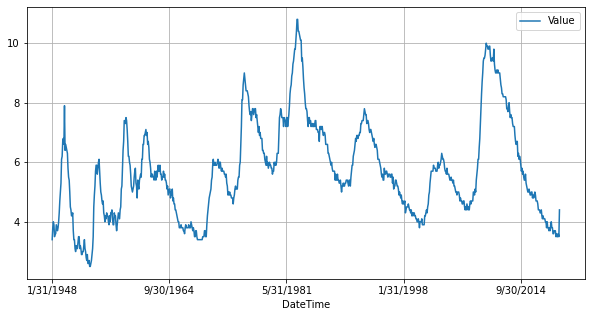

In [0]:
# Regression Analysis forecast Unemployment rate  for United States
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
forecast_col = 'Value'
covid_col='covid'
forecast_out = 10
test_size = 0.2

covid= False
#Prepare the data for US
print("Regression Analysis forecast of Unemployment rate  for United States")
us_unemp= pd.read_csv('historical_country_United_States_indicator_Unemployment_Rate.csv')
print(us_unemp.head())

us_unemp1= us_unemp[['DateTime', 'Value']]
us_unemp1.plot(x='DateTime', y=['Value'], figsize=(10,5), grid=True)


X_train, X_test, Y_train, Y_test , X_forecast= prepare_data(us_unemp1,forecast_col,covid_col,covid,forecast_out,test_size);
#Ordinary Liner Regression
learner = linear_model.LinearRegression(); 
learner.fit(X_train,Y_train);
score=learner.score(X_test,Y_test);
forecast= learner.predict(X_forecast)
print(score)
print(forecast)

#Ridge Regression
print("Ridge")
clf = Ridge(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Lasso Regrssion
print("Lasso: ")
clf = Lasso(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))

score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Support Vector regressor
print("SVR")
clf=SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)


Regression Analysis forecast of Unemployment rate  for United Kingdom
          Country           Category  ... HistoricalDataSymbol           LastUpdate
0  United Kingdom  Unemployment Rate  ...             UKUEILOR  2015-12-16T10:10:00
1  United Kingdom  Unemployment Rate  ...             UKUEILOR  2015-12-16T10:10:00
2  United Kingdom  Unemployment Rate  ...             UKUEILOR  2015-12-16T10:10:00
3  United Kingdom  Unemployment Rate  ...             UKUEILOR  2015-12-16T10:10:00
4  United Kingdom  Unemployment Rate  ...             UKUEILOR  2015-12-16T10:10:00

[5 rows x 7 columns]
0.9350197861315745
[3.99966332 4.09419263 3.99966332 4.09419263 3.99966332 3.99966332
 3.99966332 3.99966332 4.09419263 4.18872194]
Ridge
r2 score is = 0.9350036716616507
0.9350036716616507
[4.00170083 4.09616583 4.00170083 4.09616583 4.00170083 4.00170083
 4.00170083 4.00170083 4.09616583 4.19063082]
Lasso: 
r2 score is = 0.914080147129281
0.9140801471292809
[4.41696871 4.49832564 4.41696871 4.498325

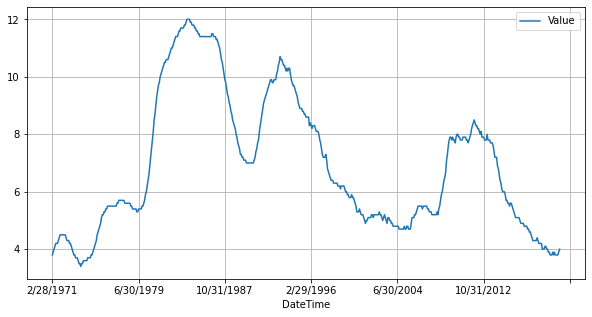

In [0]:
# Regression Analysis forecast Unemployment rate  for United Kingdom
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
#Prepare the data for UK
print("Regression Analysis forecast of Unemployment rate  for United Kingdom")
unemp_data= pd.read_csv('historical_country_United_Kingdom_indicator_Unemployment_Rate.csv')
print(unemp_data.head())


unemp_data1= unemp_data[['DateTime', 'Value']]
unemp_data1.plot(x='DateTime', y=['Value'], figsize=(10,5), grid=True)

forecast_col = 'Value'
covid_col='covid'
forecast_out = 10
test_size = 0.2

covid= False

X_train, X_test, Y_train, Y_test , X_forecast= prepare_data(unemp_data1,forecast_col,covid_col,covid,forecast_out,test_size);
#Ordinary Liner Regression
learner = linear_model.LinearRegression(); 
learner.fit(X_train,Y_train);
score=learner.score(X_test,Y_test);
forecast= learner.predict(X_forecast)
print(score)
print(forecast)

#Ridge Regression
print("Ridge")
clf = Ridge(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Lasso Regrssion
print("Lasso: ")
clf = Lasso(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))

score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Support Vector regressor
print("SVR")
clf=SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)


Regression Analysis forecast of Unemployment rate  for China
  Country           Category  ... HistoricalDataSymbol  LastUpdate
0   China  Unemployment Rate  ...             CNUERATE   6/27/2011
1   China  Unemployment Rate  ...             CNUERATE   6/27/2011
2   China  Unemployment Rate  ...             CNUERATE   6/27/2011
3   China  Unemployment Rate  ...             CNUERATE   6/27/2011
4   China  Unemployment Rate  ...             CNUERATE   6/27/2011

[5 rows x 7 columns]
0.844989778548143
[5.18481317 5.28368413 5.3825551  6.27239378 5.97578088]
Ridge
r2 score is = 0.8457921306151513
0.8457921306151512
[5.18013374 5.27836979 5.37660584 6.26073028 5.96602213]
Lasso: 
r2 score is = 0.8479539266937678
0.8479539266937678
[5.16365009 5.2596496  5.3556491  6.21964466 5.93164614]
SVR
r2 score is = 0.9337285549821069
0.9337285549821069
[5.17292196 5.24218446 5.32085733 8.14023506 6.69738112]


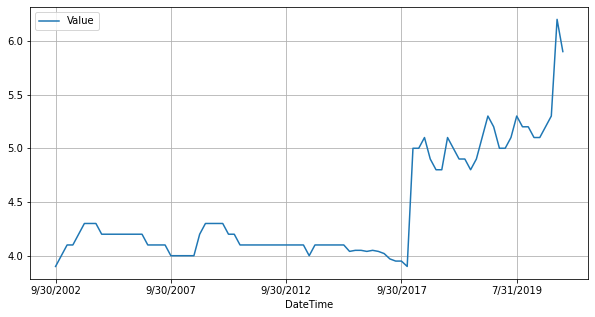

In [0]:
# Regression Analysis forecast Unemployment rate  for China
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
# Prepare data for China
print("Regression Analysis forecast of Unemployment rate  for China")
unemp_data= pd.read_csv('historical_country_China_indicator_Unemployment_Rate.csv')
print(unemp_data.head())


unemp_data1= unemp_data[['DateTime', 'Value']]
unemp_data1.plot(x='DateTime', y=['Value'], figsize=(10,5), grid=True)

forecast_col = 'Value'
covid_col='covid'
forecast_out = 5
test_size = 0.2

covid= False

X_train, X_test, Y_train, Y_test , X_forecast= prepare_data(unemp_data1,forecast_col,covid_col,covid,forecast_out,test_size);
#Ordinary Liner Regression
learner = linear_model.LinearRegression(); 
learner.fit(X_train,Y_train);
score=learner.score(X_test,Y_test);
forecast= learner.predict(X_forecast)
print(score)
print(forecast)

#Ridge Regression
print("Ridge")
clf = Ridge(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Lasso Regrssion
print("Lasso: ")
clf = Lasso(alpha=0.01)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))

score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
#Support Vector regressor
print("SVR")
clf=SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)
